## 4.6 2차원 로지스틱 회귀를 위한 데이터 설정

In [9]:
import tensorflow as tf # 관련 라이브러리들을 불러옵니다
import numpy as np
import matplotlib.pyplot as plt

In [10]:
learning_rate = 0.1 # 하이퍼파라미터를 설정합니다
training_epochs = 1000

def sigmoid(x): # 도우미 시그모이드 함수를 정의합니다
    return 1. / (1. + np.exp(-x))

In [11]:
x1_label1 = np.random.normal(3, 1, 1000) # 가짜 데이터를 초기화합니다
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)

x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

## 4.7 다차원 로지스틱 회귀를 위한 텐서플로의 사용

In [12]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1") # 입력/출력 플레이스홀더 노드를 정의합니다
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True) # 파라미터 노드를 정의합니다

In [13]:
y_model = tf.sigmoid(-(w[2] * X2 + w[1] * X1 + w[0])) # 입력 변수 모두를 이용하여 시그모이드 모델을 정의합니다
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y))) # 학습 단계를 정의합니다
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [14]:
with tf.Session() as sess: # 새로운 세션을 생성하고, 변수들을 초기화하고, 수렴시까지 파라미터를 학습합니다
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        if epoch % 100 == 0:
            print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys}) # 세션을 닫기 전에 학습된 파라미터 값을 얻습니다

0 0.69314724
100 0.3684867
200 0.2661808
300 0.20840502
400 0.17195627
500 0.14703928
600 0.12896608
700 0.11525992


In [15]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100): # 점들간에 반복 수행합니다
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0]) # 만약 모델의 결과가 0.5에 가까우면 경계 점을 업데이트합니다
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

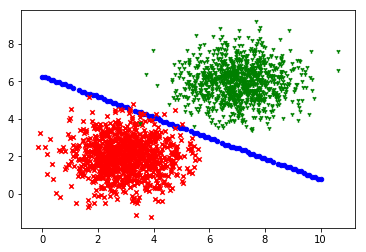

In [16]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20) # 데이터를 따라 경계선을 보여줍니다
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()